<center>
<h1>Sistema de Software para Investigación en Sistemas Dinámicos Discretos</h1>
<hr>    
<h2>Renato Leriche Vázquez</h2>
<h2>Jefferson E. King Dávalos</h2>
<h2>Luis Muñiz Valledor</h2>
<hr>
<img width="100" src="LogoUNAM.png"/>Departamento de Matemáticas, Facultad de Ciencias, UNAM
</center>

Presentaremos los avances de desarrollo de un sistema de software, formado por un ecosistema de bibliotecas y una aplicación,

creado para ser útil en la investigación y docencia en el área de sistemas dinámicos discretos.

Este trabajo es parcialmente financiado por el **Programa de Apoyo a Proyectos de Investigación e Innovación Tecnológica** (**PAPIIT**) de la UNAM

en el *Proyecto PAPIIT-UNAM IT103720* con título

> "Sistema de Software para Investigación en Sistemas Dinámicos Discretos"

Equipo de trabajo:
- Responsable: **Dr. Jefferson E. King Dávalos**.
- *Project Manager*: **Renato Leriche Vázquez** (tesista de Doctorado del Dr. Guillermo Sienra).
- *Senior Software Developer*: **Luis Muñiz Valledor** (tesista de Licenciatura del Dr. Marco Montes de Oca).
- *Software Developer*: **José D. Blancas Camarena** (tesista de Licenciatura de Renato Leriche).
- *Software Developer*: **Edgar A. Rodríguez Lucio** (tesista de Licenciatura de Renato Leriche).
- *Software Developer*: **Fernando Santana Plascencia** (tesista de Licenciatura del Dr. Jefferson King).
- *Software Developer*: **Ian X. Belaustegui** (servicio social).
- Colaborador: **Dr. Guillermo F.J. Sienra Loera**.
- Colaborador: **Dr. Marco A. Montes de Oca Balderas**.

(Todos del Departamento de Matemáticas, Facultad de Ciencias, UNAM.)

## Bibliotecas de software

Una *biblioteca de software* proporciona un conjunto de instrucciones (sobre un lenguaje de programación) para construir soluciones a problemas en cierta área.

Las principales bibliotecas de software creadas en este proyecto son:

- ***SDD***: Para la teoría de iteración de funciones en $\mathbb{R}$, $\mathbb{R}^2$ y $\mathbb{C}$.

- ***SDDIFS***: Para la teoría de sistemas de funciones iteradas.

- ***SDDKleinianGroups***: Para la teoría de grupos Kleinianos.

Además, de las bibliotecas de software complementarias:
- ***SDDCore***. Instrucciones en común a todas las bibliotecas.
- ***SDDGraphics***. Elementos básicos para visualización.
- ***SDDGeometry***. Construcción y manejo de objetos y transformaciones geométricas.

***SDD*** es el nombre de nuestro software y significa "Sistemas Dinámicos Discretos".

El software para este proyecto fué desarrollado utilizando el lenguaje de programación ***Julia***.
<center><img width="200" src="julia_logo.png"/></center>

Se elegió este ***Julia*** por ser un lenguaje de programación moderno, especialmente diseñado para cómputo científico y que combina simplicidad con eficiencia.

In [1]:
using Revise, Pkg

In [2]:
Pkg.develop(path="/home/rleriche/Software/Dev/SDD/SDDCore.jl")

In [3]:
Pkg.develop(path="/home/rleriche/Software/Dev/SDD/SDDGeometry.jl")

In [4]:
Pkg.develop(path="/home/rleriche/Software/Dev/SDD/SDDGraphics.jl")

In [5]:
Pkg.develop(path="/home/rleriche/Software/Dev/SDD/SDD.jl")

In [6]:
Pkg.develop(path="/home/rleriche/Software/Dev/SDD/SDDKleinianGroups.jl")

In [7]:
Pkg.develop(path="/home/rleriche/Software/Dev/SDD/SDDIFS.jl")

In [8]:
using Colors, ColorSchemes

In [9]:
using SDDCore, SDDGeometry, SDD, SDDIFS, SDDKleinianGroups

┌ Info: Precompiling SDDIFS [a4a25ec0-9c31-48cb-b4a7-8df420687997]
└ @ Base loading.jl:1317


In [10]:
import SDDGraphics
Gr = SDDGraphics
SDDGraphics.backend(:luxor)

:luxor

En esta presentación haremos programación en vivo, pues estamos usando el ambiente ***Jupyter*** que permite usar ***Julia*** de manera fácil e interactiva.

Haremos recuento de algunas de las posibilidades que ofrecen las bibliotecas y mostraremos en vivo las imágenes generadas.

## La biblioteca *SDD*

In [ ]:
using SDD

### Gráficas de iteradas

Dada $f:\mathbb{R}\rightarrow\mathbb{R}$ podemos graficar $f^n$ con la instrucción `plot`.

#### Ejemplo
$L(x)=4x(1-x)$, la función logística.

In [26]:
L4(x) = 4x*(1-x)

L4 (generic function with 1 method)

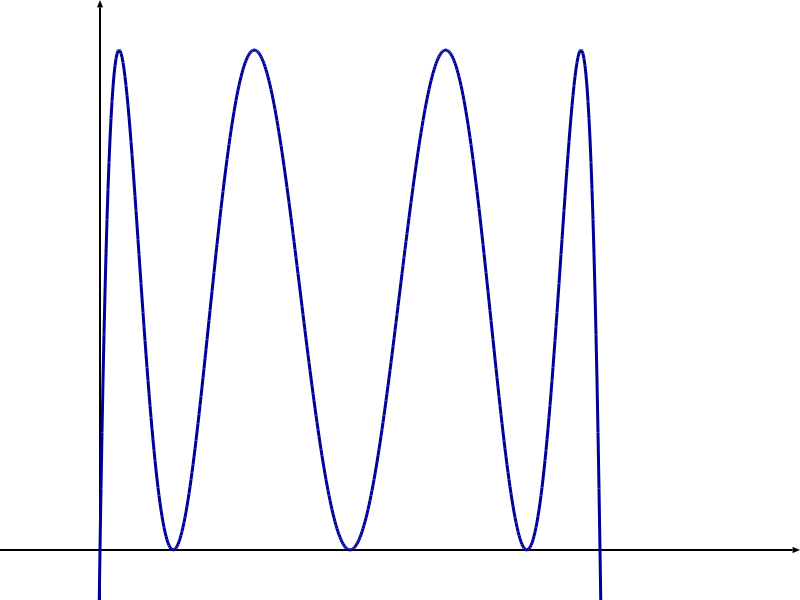

In [29]:
Gr.backend(:luxor)
Gr.configure(rect=(-0.2,1.4,-0.1,1.1), canvas=(800,600), linewidth=3, axes=true, bgcolor=RGB(1,1,1))
plot(L4, iterations=3)

### Análisis gráfico de órbitas

Dada $f:\mathbb{R}\rightarrow\mathbb{R}$ podemos graficar el análisis gráfico de laórbita de un punto con la instrucción `graphicalanalysis`.

#### Ejemplo
$L(x)=4x(1-x)$.

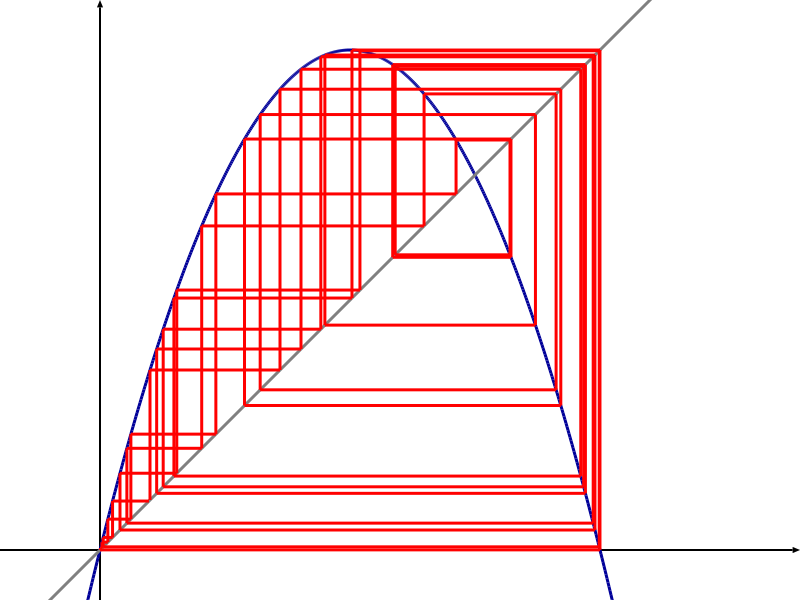

In [31]:
graphicalanalysis(L4, 0.1, iterations=40)

### Diagramas de órbitas atractoras (de bifurcación)

Dada la familia $f_\lambda:\mathbb{R}\rightarrow\mathbb{R}$ podemos graficar el diagrama de órbitas atractoras (de bifurcación) con la instrucción `orbitsdiagram`.

#### Ejemplo
La familia logística $L_\lambda(x)=\lambda x(1-x)$.

In [32]:
L(λ,x)=λ*x*(1-x)

L (generic function with 1 method)

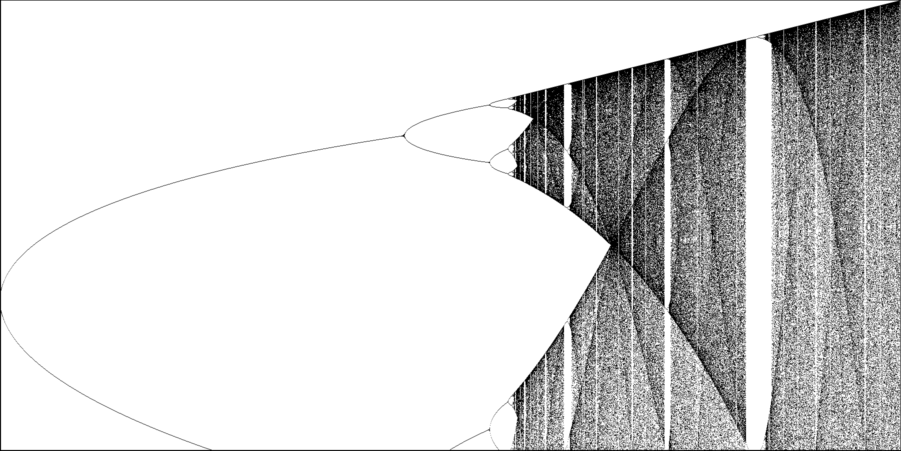

In [33]:
Gr.backend(:images)
Gr.configure(rect=(3,4,0.5,1), canvas=(1800,900))
draworbitsdiagram(L, 0.5, preiterations=500, iterations=1000)

### Órbitas de puntos
Dada una función en $\mathbb{R}^2$ o $\mathbb{C}$ podemos dibujar la órbita de un punto con `drawpointorbitR2` o`drawpointorbitC`, la trayecoria de la órbita de un punto con `drawpointorbitpathR2` o`drawpointorbitpathC`, y la órbita de varios puntos con `drawpointssetorbitR2` o`drawpointssetorbitC`.

#### Ejemplo
$S(z)=\frac{(1+6i)z+1}{z+1+6i}$, una transformación de Möbius loxodrómica.

In [34]:
S(z) = ((1+6im)*z+1)/(z+1+6im)

S (generic function with 1 method)

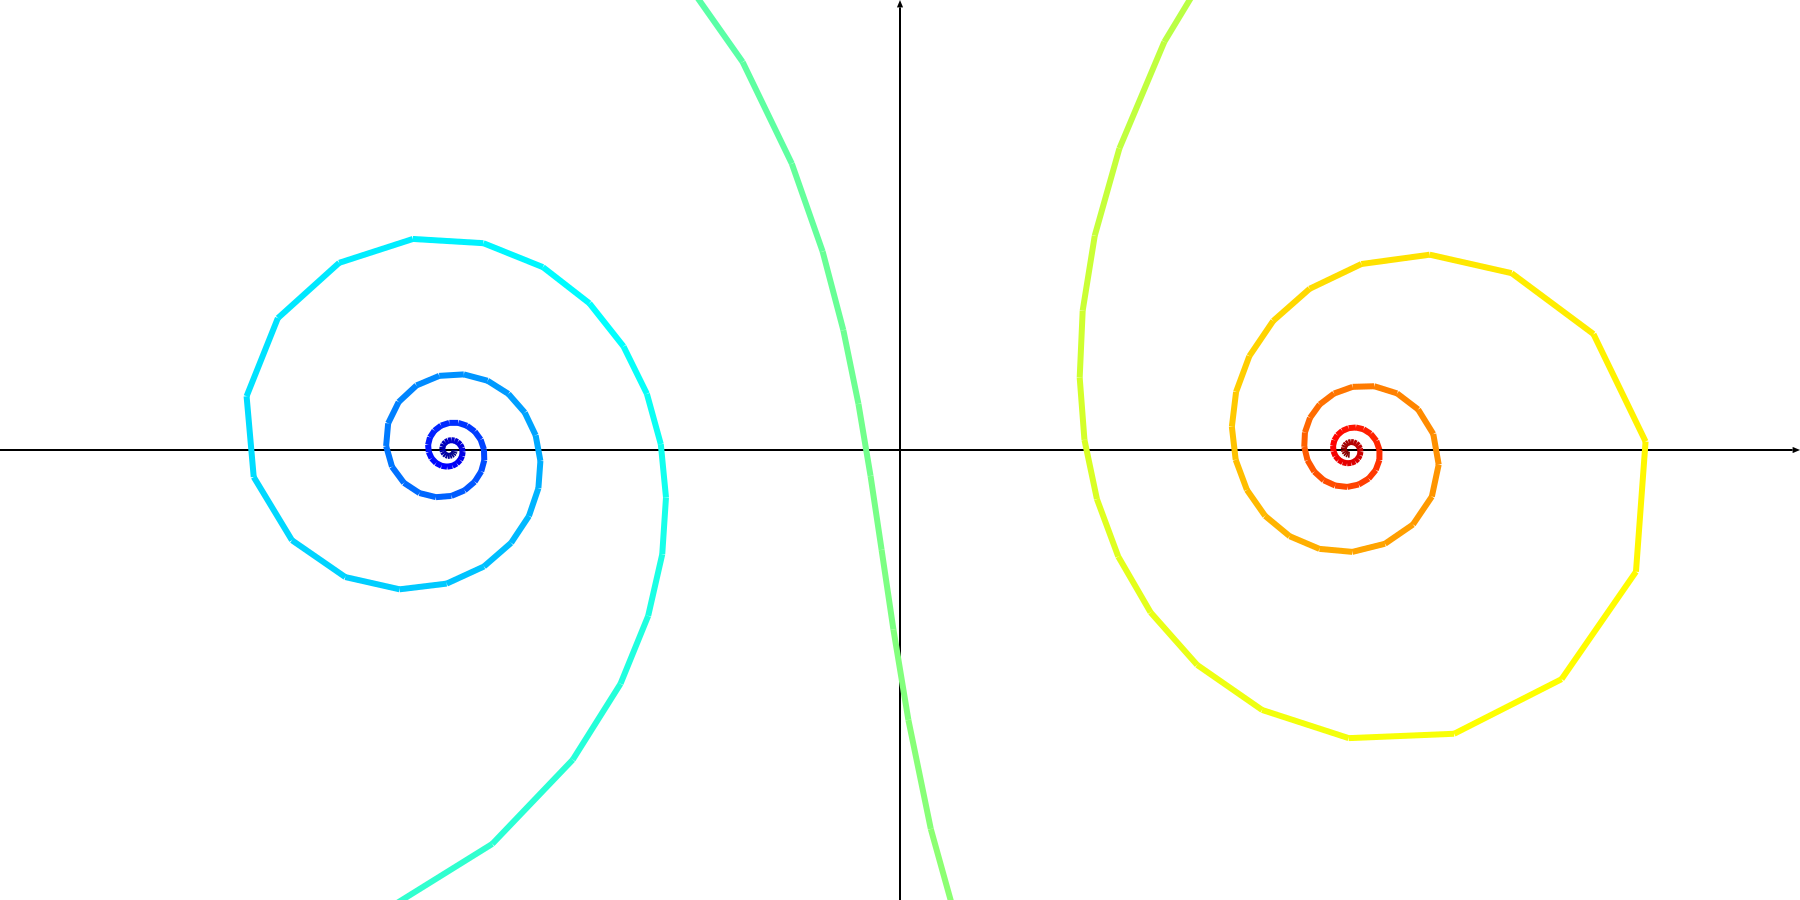

In [35]:
Gr.backend(:luxor)
Gr.configure(rect=(-2,2,-1,1), linewidth=6, colormap=:jet)
drawpointorbitpathC(S, -0.99, iterations=200)

#### Ejemplo
$H(x,y)=(1.4x+0.3y-x^2,x)$, una transformación de Hénon.

In [36]:
H(x, y) = (1.4 + 0.3y - x^2, x)

H (generic function with 1 method)

In [37]:
square = [ (x,y) for x in -1:0.05:1 for y in -1:0.05:1 ];

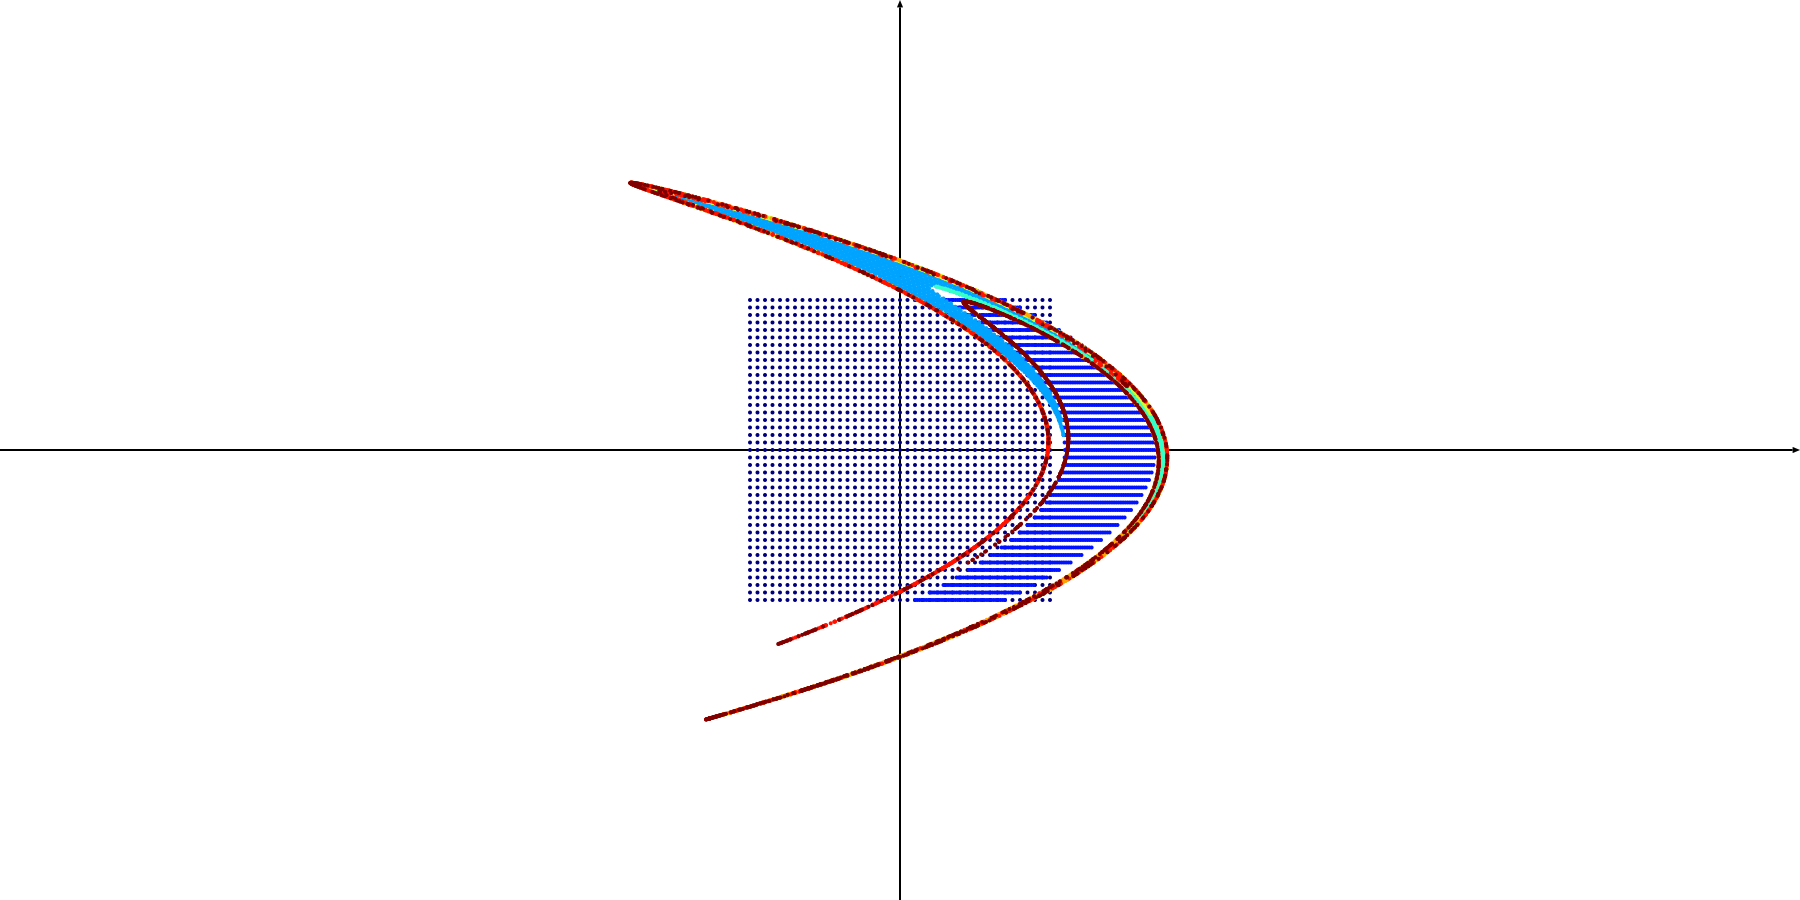

In [38]:
Gr.configure(rect=(-6,6,-3,3), pointsize=2)
drawpointssetorbitR2(H, square, iterations=8)

### Conjuntos de puntos atrapados
Dada una función en $\mathbb{R}^2$ o $\mathbb{C}$ podemos dibujar el conjunto de puntos atrapados con `drawtrappedpointsR2` o`drawtrappedpointsC`.

#### Ejemplo
$F_1(x,y)=(x^2-y^2-x,2xy+y)$, función en $\mathbb{R}^2$.

In [39]:
F1(x,y)=(x^2-y^2-x,2x*y+y)

F1 (generic function with 1 method)

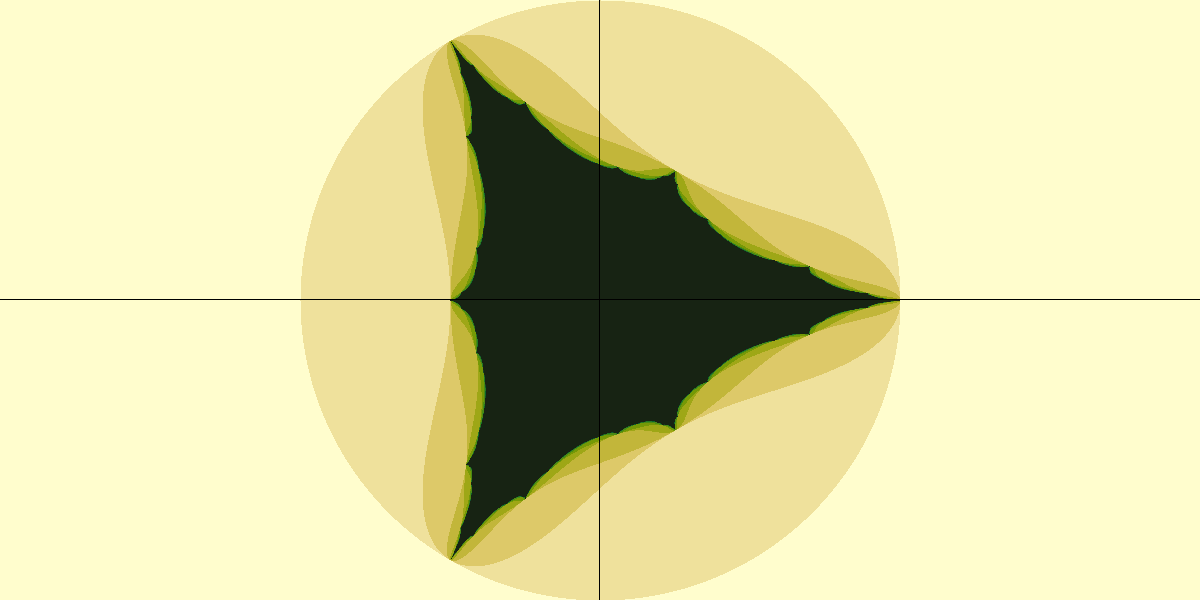

In [40]:
Gr.backend(:images)
Gr.configure(rect=(-4,4,-2,2), canvas=(1200,600), colormap=:speed)
drawtrappedpointsR2(F1, maxiterations = 12)

#### Ejemplo
$R(z)=\frac{z^3-0.05+0.1i}{z^2}$, una función racional en $\mathbb{C}$.

In [41]:
R(z)=(z^4-0.05+0.1im)/(z^2)

R (generic function with 1 method)

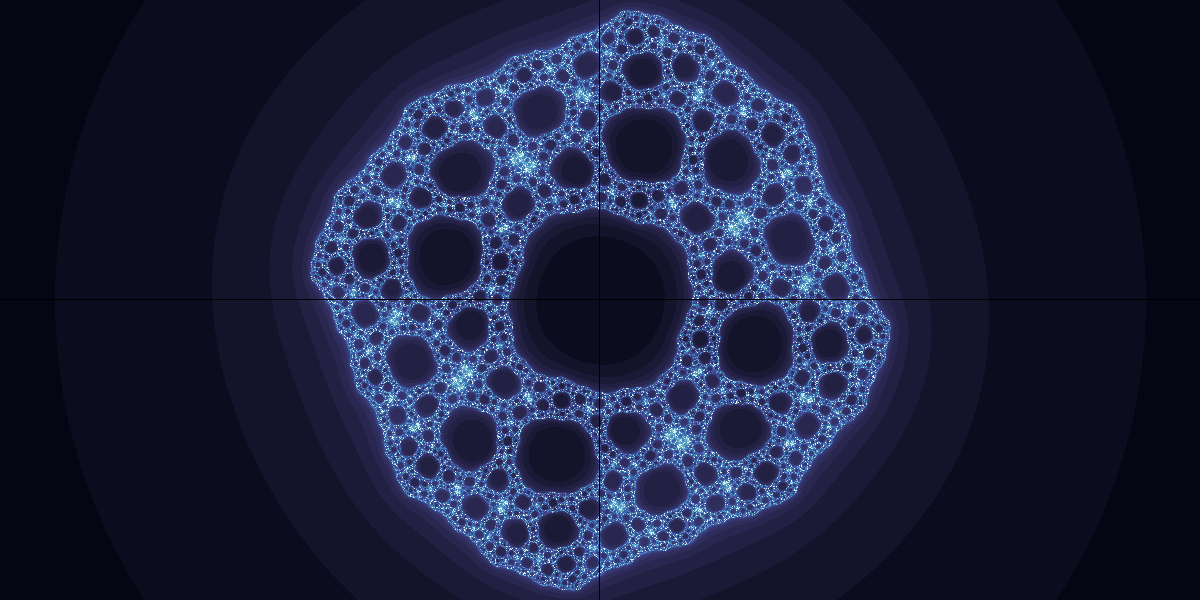

In [42]:
Gr.configure(rect=(-2.2,2.2,-1.1,1.1), colormap=:ice)
drawtrappedpointsC(R, maxiterations = 32)

#### Ejemplo
$m(z)=\sin(z)+\frac{4}{z}$, una función meromorfa trascendente.

In [43]:
m(z) = sin(z) + 4/z

m (generic function with 1 method)

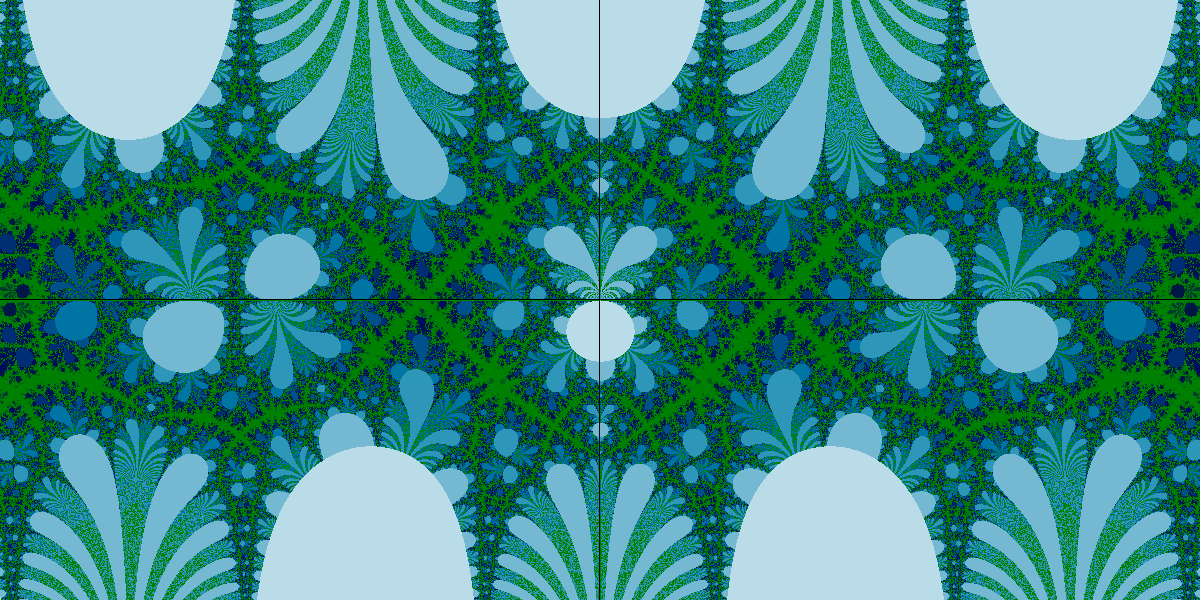

In [44]:
Gr.configure(rect=(-8,8,-4,4), colormapinv=:ocean)
drawtrappedpointsC(m, hasescaped = z -> imag(z) > 4, maxiterations = 12)

#### Ejemplo

La familia cuadrática $q_c(z)=z^2+c$ en $\mathbb{C}$.

In [45]:
q(c,z) = z^2 + c

q (generic function with 1 method)

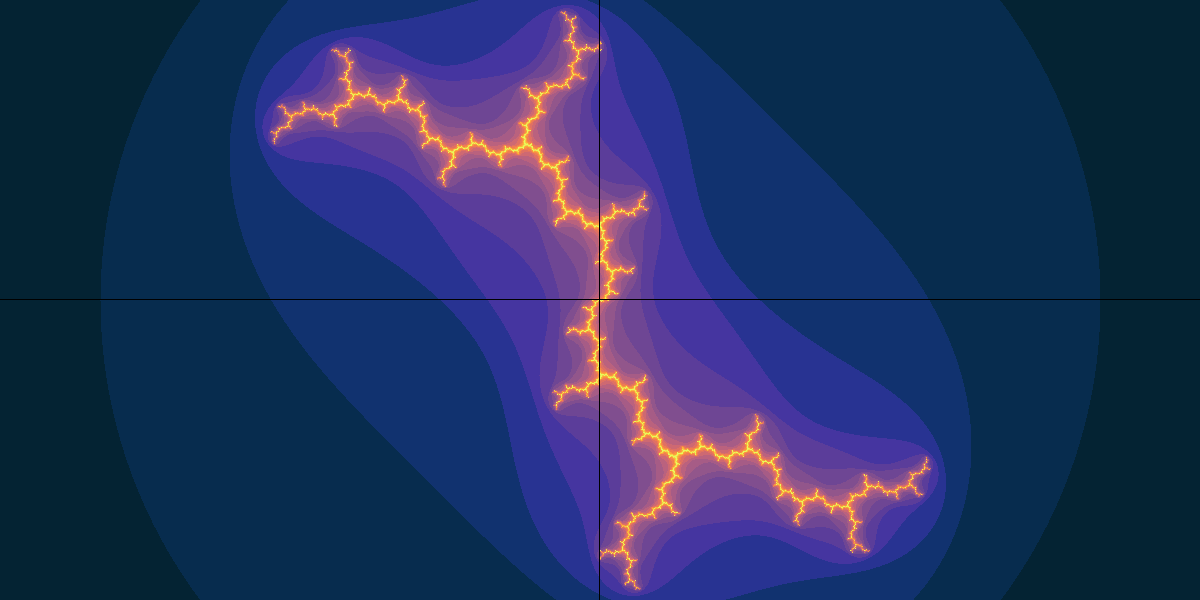

In [48]:
Gr.configure(rect=(-2.4,2.4,-1.2,1.2), colormap=:thermal)
drawtrappedpointsC(z -> q(im,z), maxiterations = 20)

### Conjuntos de Mandelbrot
Dada una familia de funciones en $\mathbb{R}^2$ o $\mathbb{C}$ podemos dibujar el conjunto de Mandelbrot con `drawmandelbrotR2` o`drawmandelbrotC`.

#### Ejemplo
La familia cuadrática $q_c(z)=z^2+c$ en $\mathbb{C}$.

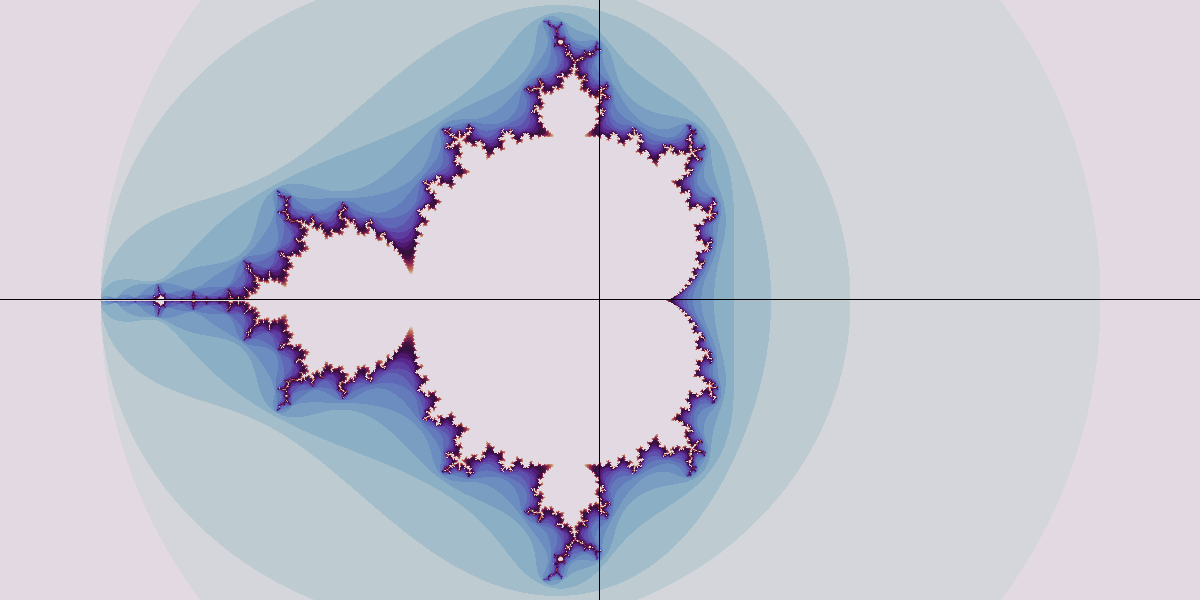

In [49]:
Gr.configure(rect=(-2.4,2.4,-1.2,1.2), colormap=:twilight)
drawmandelbrotC(q, maxiterations = 30)

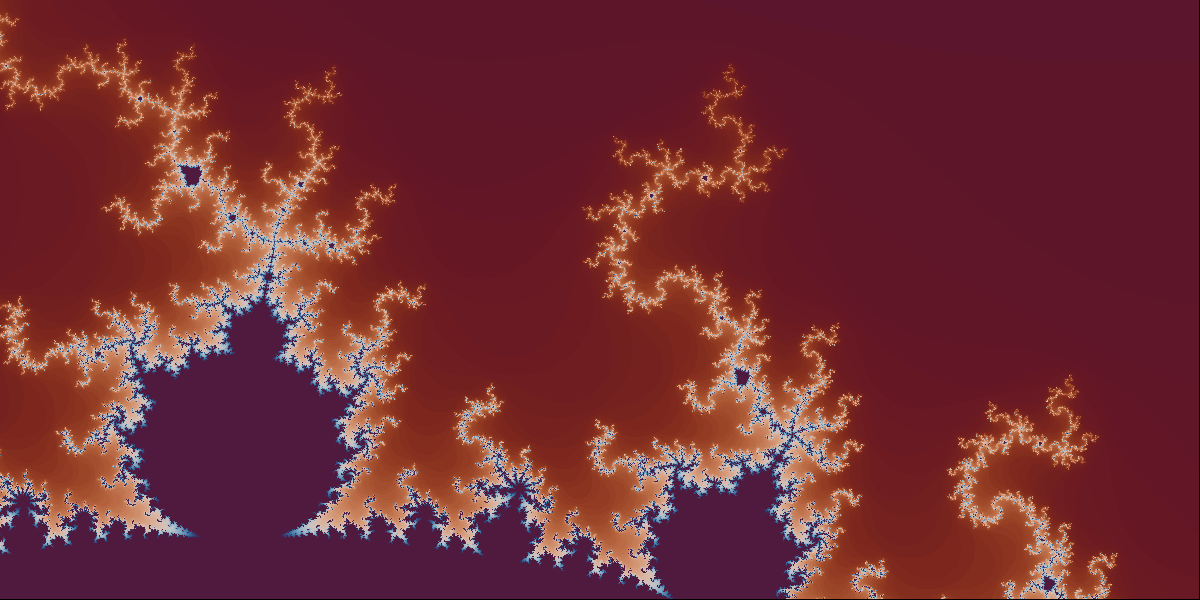

In [188]:
Gr.backend(:images)
Gr.configure(rect=(-1.04,-0.84,0.24,0.34), canvas=(1200,600), colormapinv=:vikO)
drawmandelbrotC(q, maxiterations = 120)

#### Ejemplo
$F_{a,b}(x,y)=(x^2-y^2+ax+by,2xy+-ay+bx)$, una familia en $\mathbb{R}^2$.

In [50]:
F(a,b,x,y)=(x^2-y^2+a*x+b*y,2x*y-a*y+b*x)

F (generic function with 1 method)

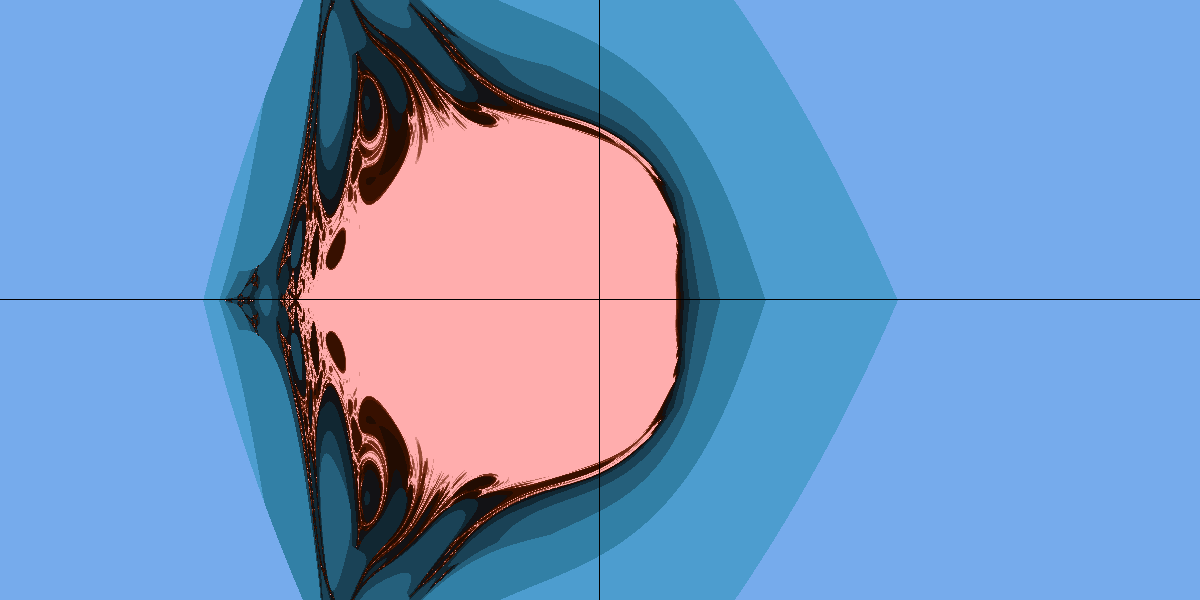

In [51]:
Gr.configure(rect=(-4,4,-2,2), colormap=:berlin)
drawmandelbrotR2(F, 0.5, hasescaped = (x,y) -> abs(x)+abs(y) > 4, maxiterations = 16)

### Cuencas de atracción

Dada una función en $\mathbb{R}^2$ o $\mathbb{C}$ y una lista de puntos periódicos atractores o parabólicos, podemos dibujar el sus cuencas de atracción con `drawbasinsR2` o`drawbasinsC`.

#### Ejemplo
$N(z) = z-\frac{1-z^3}{-3z^2}$, el método de Newton-Raphson para $f(z)=1-z^3$.

In [52]:
N(z)=z+(1-z^3)/(3z^2)

N (generic function with 1 method)

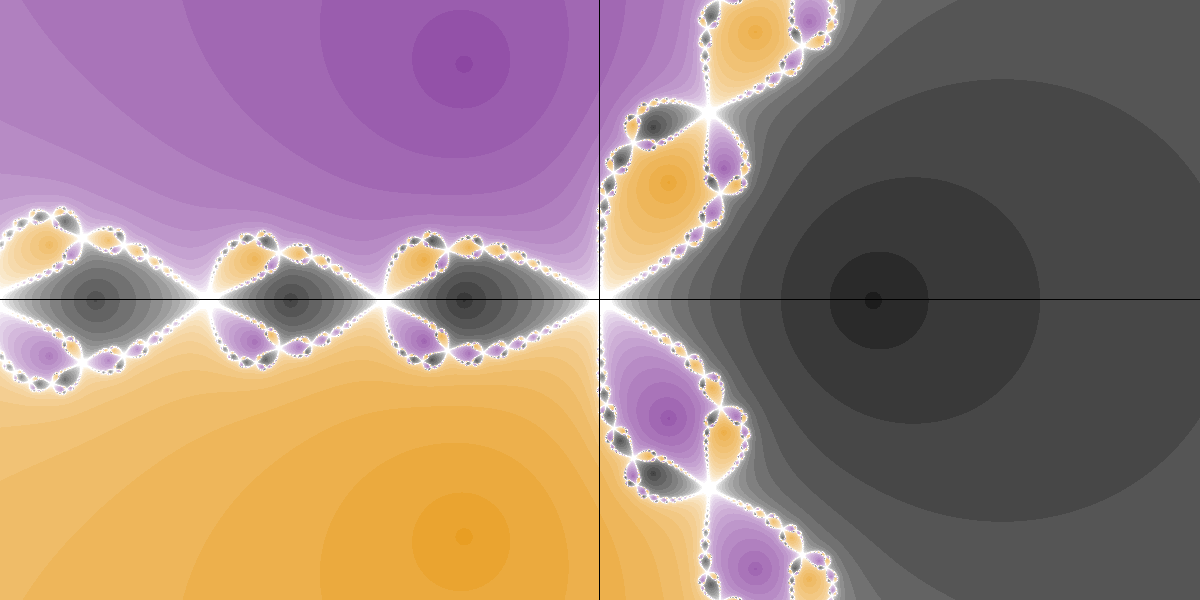

In [53]:
Gr.configure(rect=(-2.2,2.2,-1.1,1.1), colormap=:CMRmap)
drawbasinsC(N, [1,exp(2pi*im/3),exp(4pi*im/3)], maxiterations=18)

### Preimágenes

Dada una función en $\mathbb{R}^2$ o $\mathbb{C}$, podemos dibujar los mapas de preimágenes de las $n$-ésimas iteradas con `drawpreimagesR2` o `drawpreimagesC`.

#### Ejemplo

$R_{herman}(z)=e^{2\pi (0.6151732...) i}\frac{z^2(z-4)}{1-4z}$, una función racional con anillo de Herman.

In [54]:
Herman(z::Number) = exp(2π*0.6151732*im)*(z^2)*(z-4)/(1-4z)

Herman (generic function with 1 method)

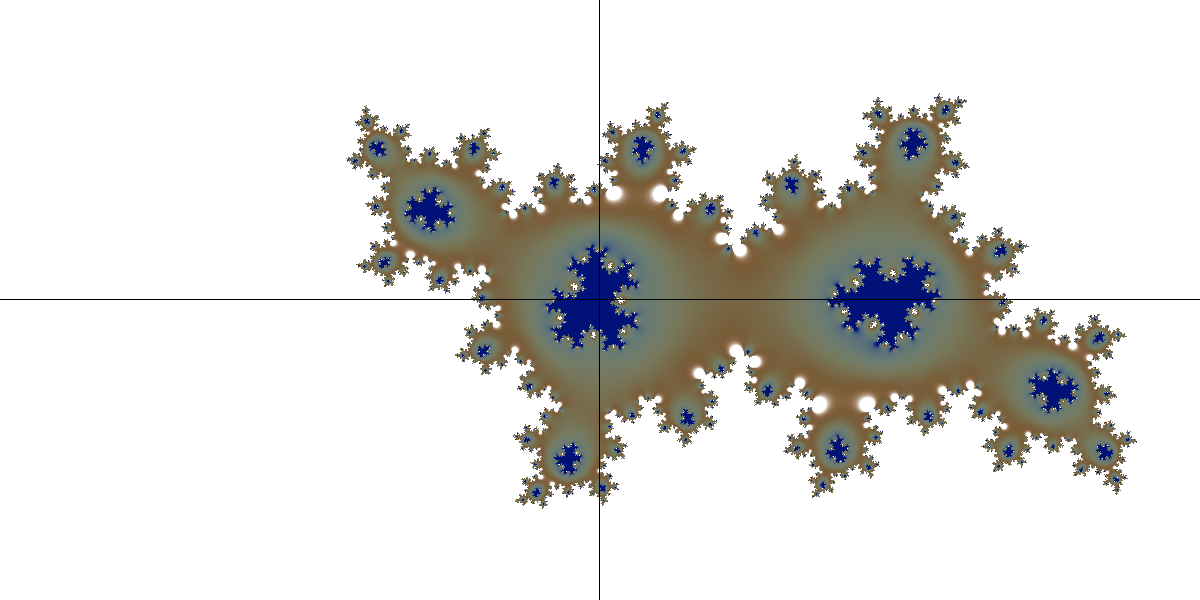

In [55]:
Gr.configure(rect=(-8,8,-4,4), colormap=:darkterrain, cf=RadialCF(0,0,innerradius=0.25,outerradius=2))
drawpreimageC(Herman, iterations=24)

#### Ejemplo

Con la familia cuadrática $q_c(z)=z^2+c$ en $\mathbb{C}$, puntos de periodo $3$ con $f(z)=q_c^{36}(z)-z$.

In [56]:
qrabbit = z -> q(-0.122656 + 0.744864im, z)
qrabbit36 = SDDCore.compose(qrabbit, 36)
f36(z::Number) = qrabbit36(z) - z

f36 (generic function with 1 method)

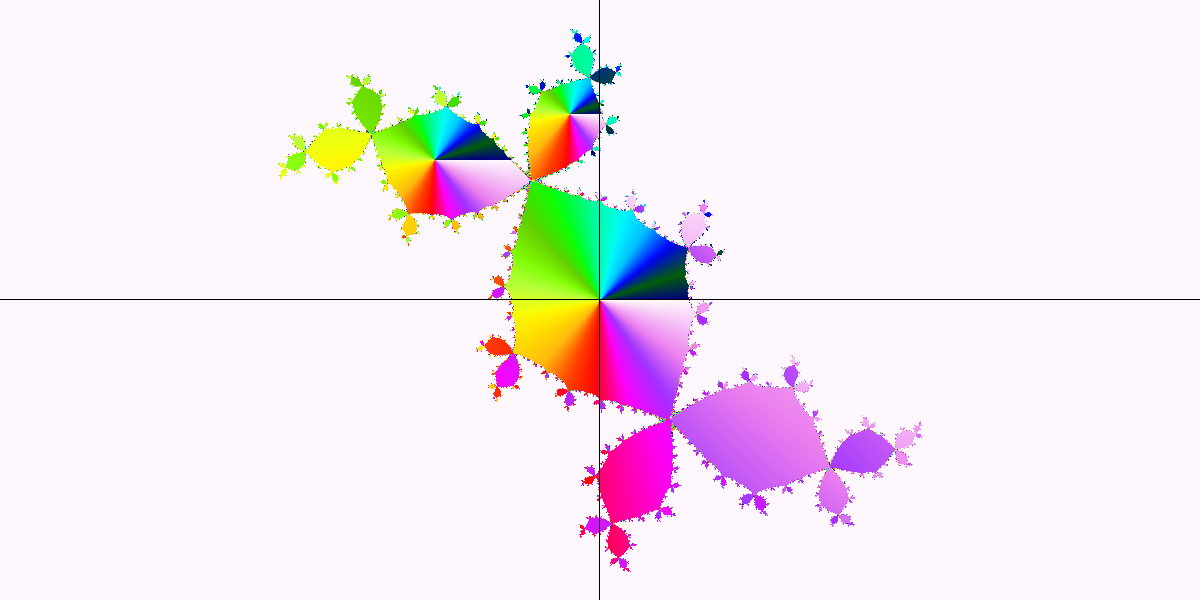

In [57]:
Gr.configure(rect=(-2.4,2.4,-1.2,1.2), colormap=:gist_ncar, cf=AngleCF())
drawpreimageC(f36, iterations=1)

#### Ejemplo

Preimagen de un tablero de ajedrez bajo $q_c^2$.

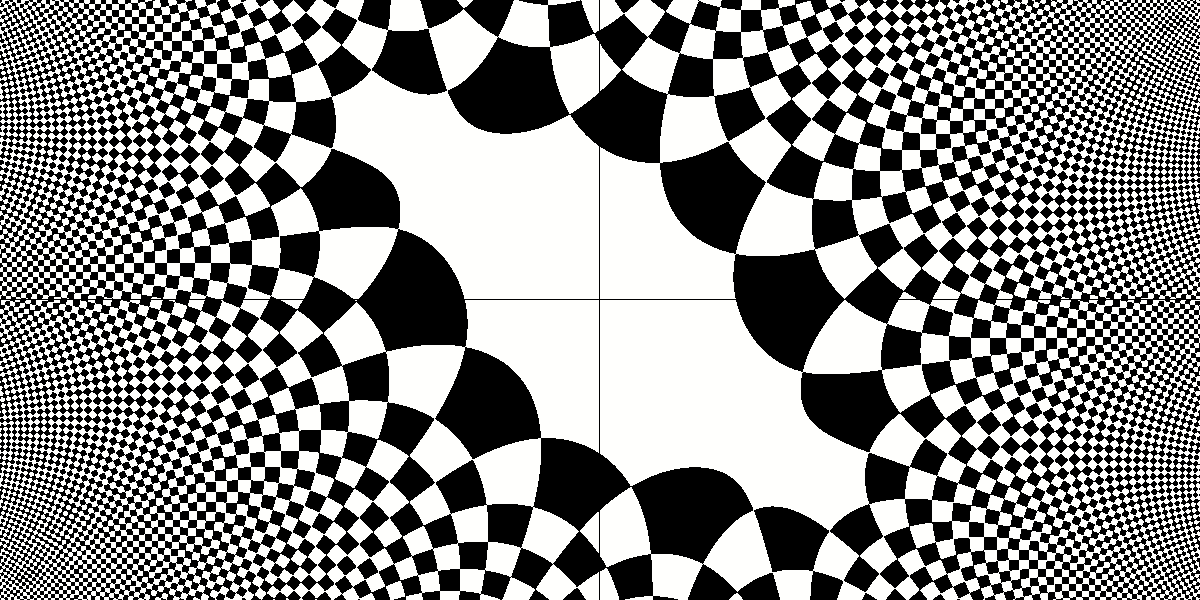

In [58]:
Gr.configure(rect=(-2.4,2.4,-1.2,1.2), colormap=:grays, cf=ChessCF(0,0,1,1))
drawpreimageC(qrabbit, iterations=2)

## La biblioteca *SDDIFS*

In [ ]:
using SDDIFS

### Atractores
Dado un *sistema de funciones iteradas*, podemos dibujar su atractor con la instrucción `drawattractorC`.

#### Ejemplo
Un triángulo de Sierpinsky como atractor de $\{z\mapsto \frac{1}{2}z, \,z\mapsto \frac{1}{2}z+1, z\mapsto \frac{1}{2}z+i\}$.

In [59]:
sierpinsky = [LinearTransformation(0.5), AffineTransformation(0.5,1), AffineTransformation(0.5,im)];

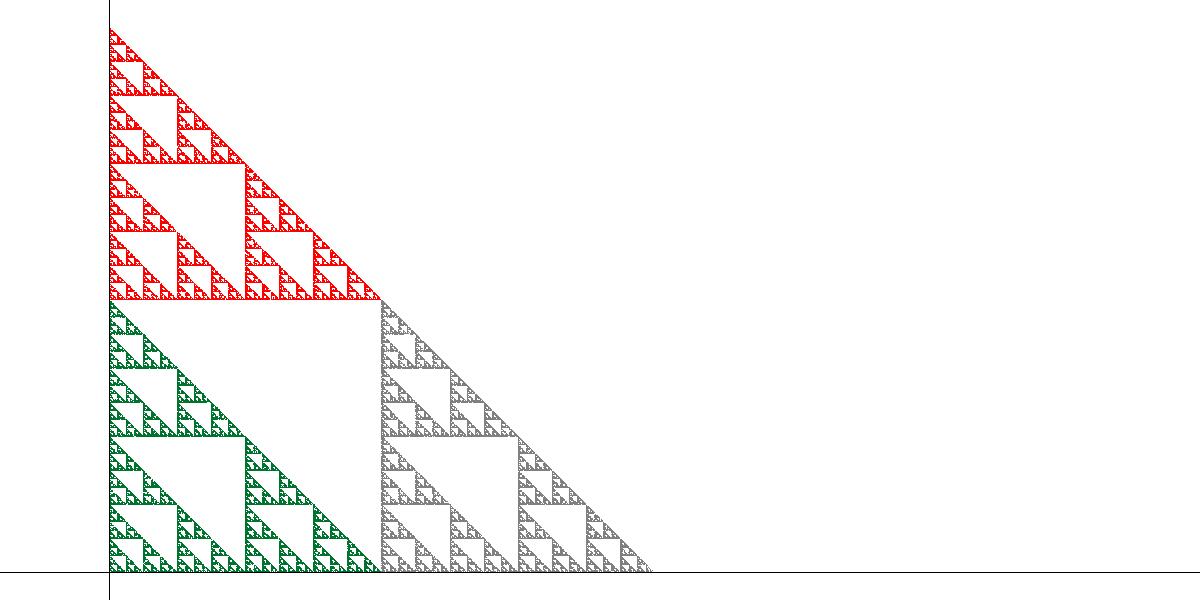

In [60]:
Gr.configure(rect=(-0.4,4,-0.1,2.1), colormap=:flag_ae)
drawattractorC(sierpinsky, iterations=100000)

#### Ejemplo
Una curva de Koch-Peano como atractor de $\{z\mapsto a\overline{z}, \,z\mapsto a+(1-a)\overline{z}\}$.

In [61]:
a = 0.56+0.37im
kochpeano=[z -> a*conj(z), z -> a+(1-a)*conj(z)];

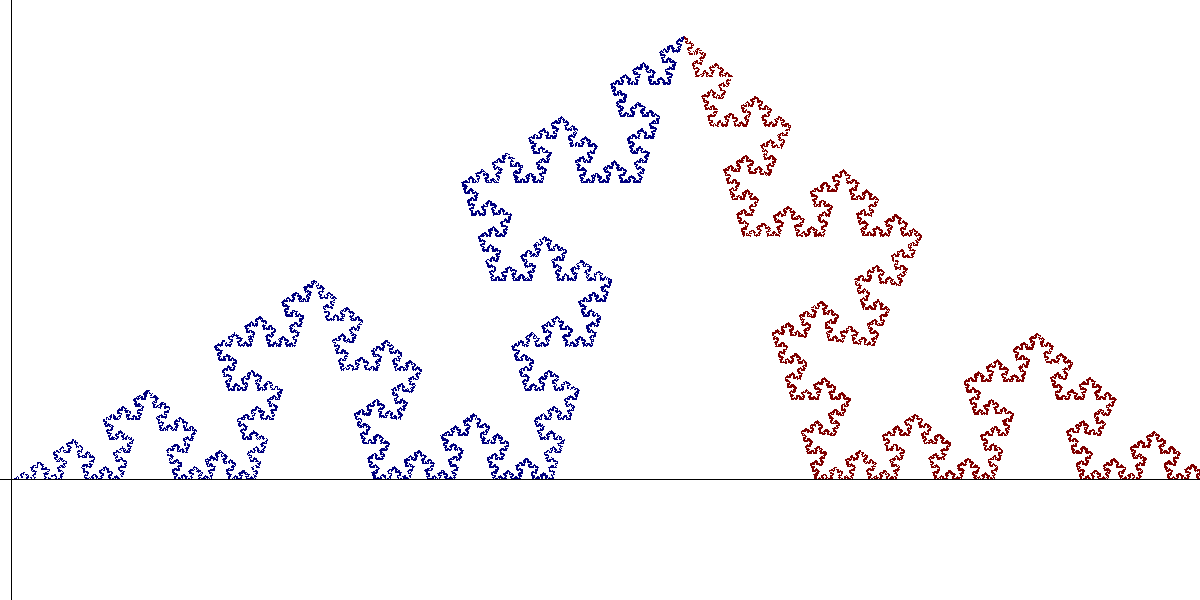

In [62]:
Gr.configure(rect=(-0.01,0.99,-0.1,0.4), colormap=:jet)
drawattractorC(kochpeano, iterations=100000)

## La biblioteca *SDDKleinianGroups*

In [ ]:
using SDDKleinianGroups

### Órbitas de puntos
Podemos dibujar las órbitas de puntos o conjuntos de puntos con `drawpointorbit` y `drawpointssetorbit`.

#### Ejemplo
Carpeta de Apolonio con el grupo $\big<A_1, A_2\big>$ dado por
$$ A_1(z)=\frac{z}{-2iz+1} $$

$$ A_2(z)=\frac{(1-i)z+1}{z+1+i} $$

In [63]:
apollonian = [MobiusTransformation(1,0,-2im,1), MobiusTransformation(1-im,1,1,1+im)];

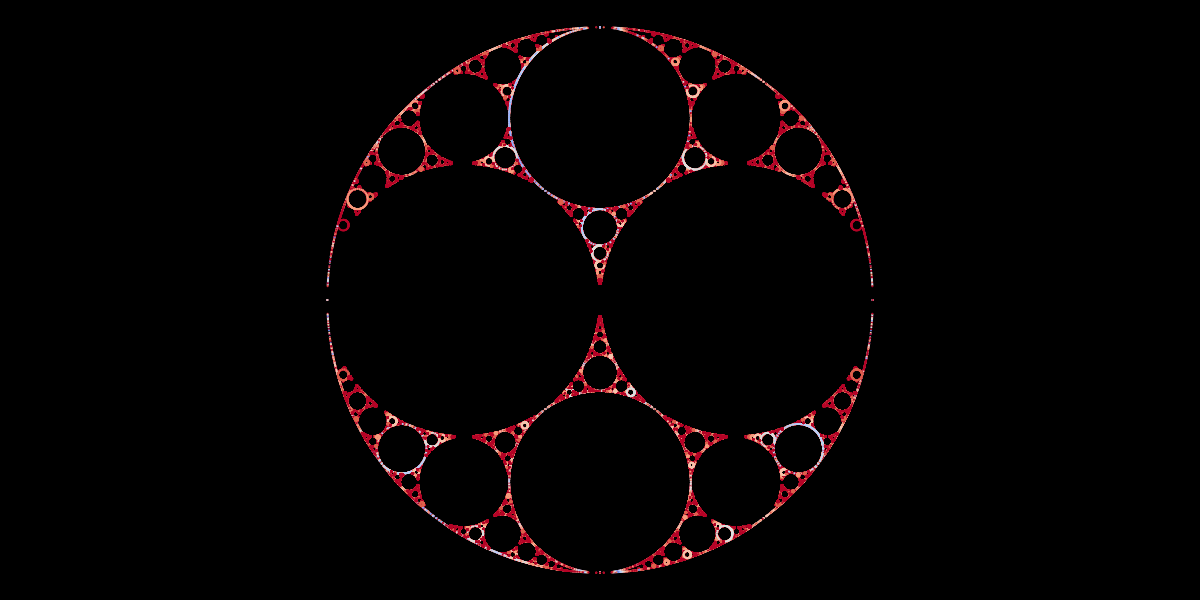

In [190]:
Gr.backend(:luxor)
Gr.configure(rect=(-2.2,2.2,-1.1,1.1), pointsize=1, colormap=:coolwarm, bgcolor=RGB(0,0,0))
drawpointssetorbit(apollonian, circlecomplexes(0,1), iterations=8)

### Órbitas de círculos
Podemos dibujar también órbitas de círculos o conjuntos de círculos, con `drawcircleorbit` y `drawcirclessetorbit`.

#### Ejemplo
Carpeta de Apolonio, con la órbita del círculo con centro en $-\frac{1}{2}$ y radio $\frac{1}{2}$.

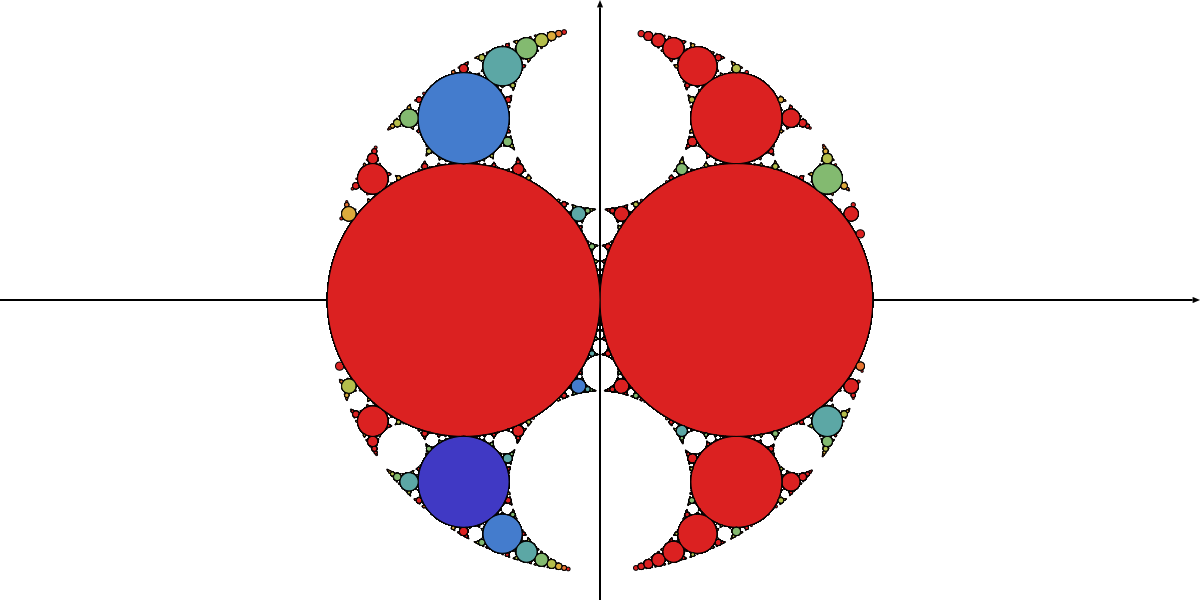

In [64]:
Gr.backend(:luxor)
Gr.configure(rect=(-2.2,2.2,-1.1,1.1), style=:fillborder, colormap=:rainbow, lw=1, bgcolor=RGB(1,1,1))
drawcircleorbit(apollonian, Circle(-0.5,0.5), iterations=8)

#### Ejemplo
Grupo de Schottky.

In [65]:
Da, Db, DA, DB = Circle(2.0+2im,1.75), Circle(1.7-1.4im,1.6), Circle(-2.0-2im,2.0), Circle(-2.0+2im,1.8)
schottkycircles = [Da, Db, DA, DB];

fa = MobiusTransformation(pickpoint(DA,0), pickpoint(DA,π/4), pickpoint(DA,π/2),
       pickpoint(Da,3π/2), pickpoint(Da,5π/4), pickpoint(Da,π)) # DA to Da
fb = MobiusTransformation(pickpoint(DB,0), pickpoint(DB,π/2), pickpoint(DB,π),
       pickpoint(Db,0), pickpoint(Db,3π/2), pickpoint(Db,π)) # DB to Db

schottkygenerators = [fa, fb];

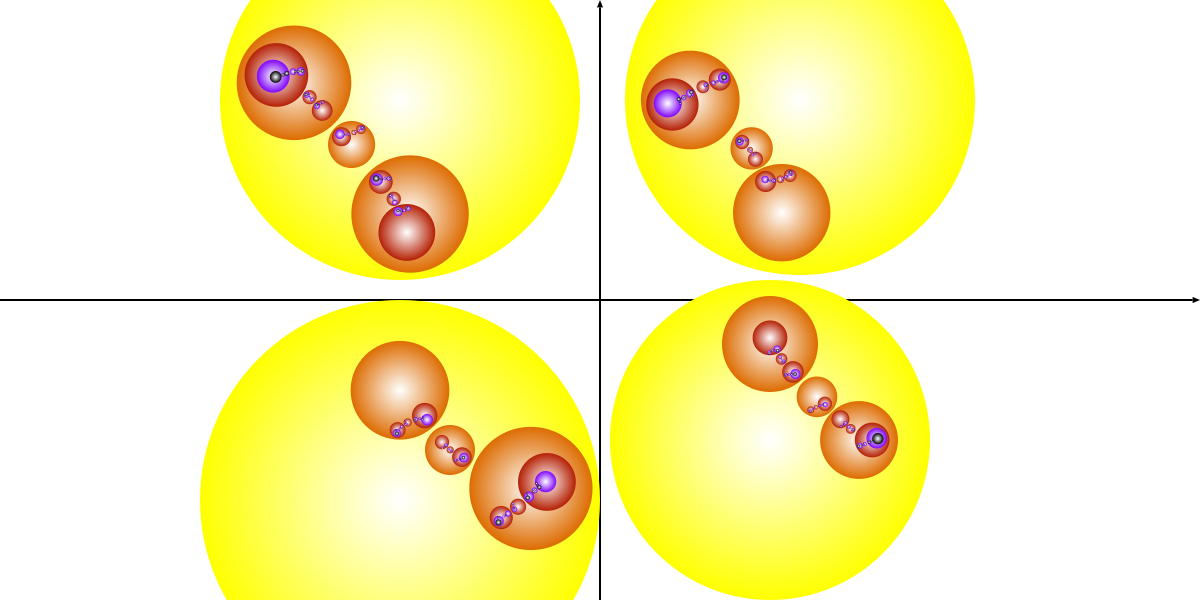

In [66]:
Gr.configure(rect=(-6,6,-3,3), style=:pearl, colormapinv=:gnuplot)
drawcirclessetorbit(schottkygenerators, schottkycircles, iterations=4, traverse=:firstbreath, paired=true)

#### Ejemplo
La carpeta de Apolonio con otros círculos.

In [67]:
specialcircles = [Circle(1000im,1000),Circle(-1-im,1), Circle(-0.25im,0.25), Circle(1-im,1)];

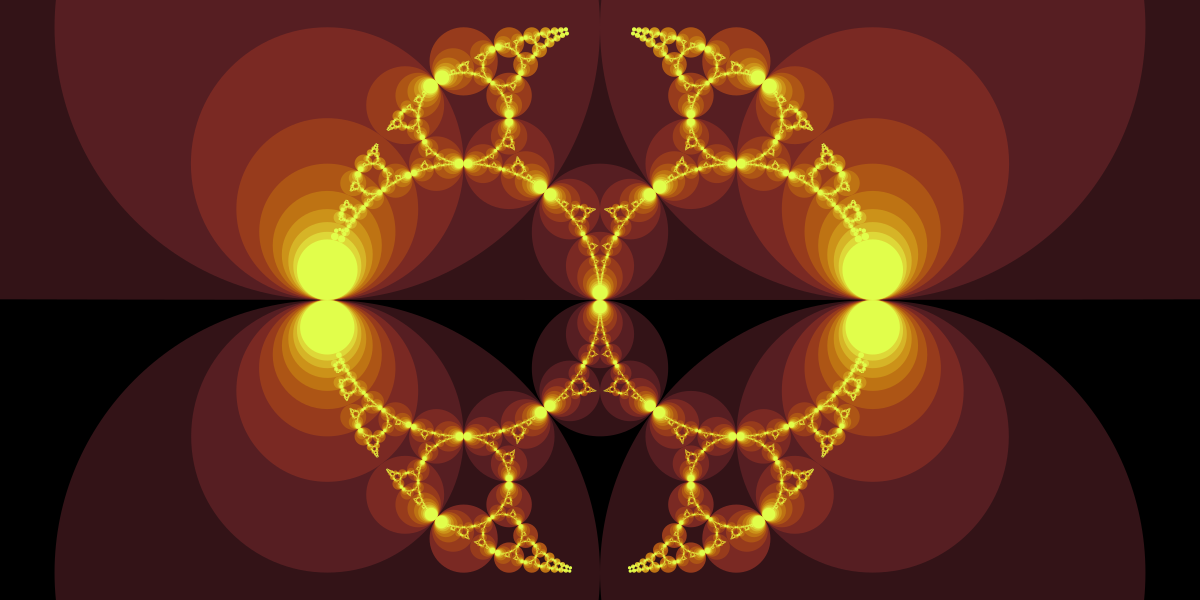

In [68]:
Gr.configure(rect=(-2.2,2.2,-1.1,1.1), style=:fill, colormap=:solar, bgcolor=RGB(0,0,0))
drawcirclessetorbit(apollonian, specialcircles, iterations=9, traverse=:firstbreath, paired=true)

### Conjuntos límite
Podemos dibujar conjuntos límite, con varios algoritmos, utilizando `drawΛ`, `drawfixedpointsΛ` o `drawchaosgameΛ`.

#### Ejemplo
Un grupo quasi-Fuchsiano.

In [69]:
ta, tb = 1.87 + 0.1im, 1.87 - 0.1im
tab = (ta*tb + sqrt(complex(ta*ta*tb*tb-4(ta*ta+tb*tb))))/2
z0 = (tab-2)*tb/(tab*tb-2ta+2im*tab)
a1, b1, c1 = ta/2, (ta*tab-2tb+4im)/((2tab+4)*z0), (ta*tab-2tb-4im)*z0/(2tab-4)
a2, b2, d2 = (tb-2im)/2, tb/2, (tb+2im)/2

quasifuchsian = [MobiusTransformation(a1,b1,c1,a1), MobiusTransformation(a2,b2,b2,d2)];

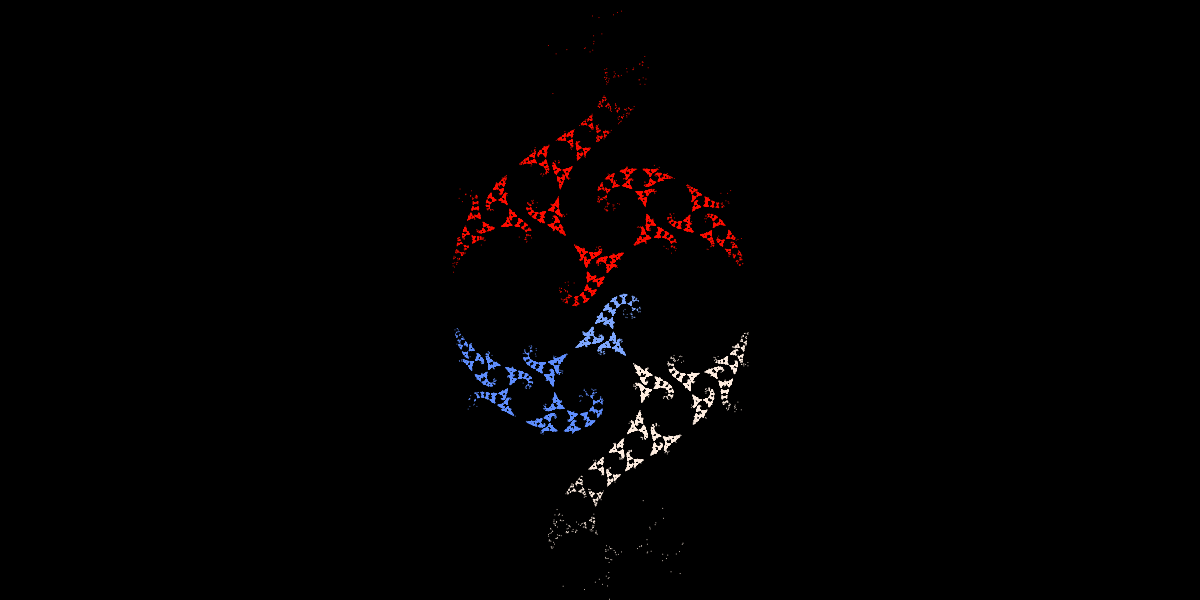

In [70]:
Gr.configure(rect=(-4,4,-2,2), pointsize=0.5, colormap=:blackbody, bgcolor=RGB(0,0,0))
drawchaosgameΛ(quasifuchsian, iterations=200000)

## Trabajo futuro

Estamos trabajando en lo siguiente, que debe estar finalizado a principios de Enero del 2022:

- En ***SDD***
    - Diagramas de bifurcación de familias de funciones reales.
    - Implementaciones de más algoritmos de dibujo de cuencas de atracción.
    - Implementaciones de más algoritmos de dibujo de conjuntos de Mandelbrot.
    - Cálculo de exponenentes de Lyapunov.

- En ***SDDIFS***
    - Implementaciones de más algoritmos de dibujo de atractores.
    - Cálculo de dimensión fractal de atractores.

- En ***SDDKleinianGroups***
    - Implementaciones de más algoritmos de dibujo de conjuntos límite.
    - Cálculo de dimensión fractal de conjuntos límite.

Y lo más importante:

- **Aplicación** de fácil uso para estudiantes, profesores e investigadores no programadores.

Todo el software que hemos desarrollado es libre y se puede descargar desde ***GitHub***.

# [github.com/Colectivo-SDD](github.com/Colectivo-SDD)


---
La versión *1.0* estable será publicada hasta Enero del 2022.

<center>

# ¡Gracias!
    
</center>

In [11]:
EW(λ::Number,z::Number) = λ*z*exp(z)

EW (generic function with 1 method)

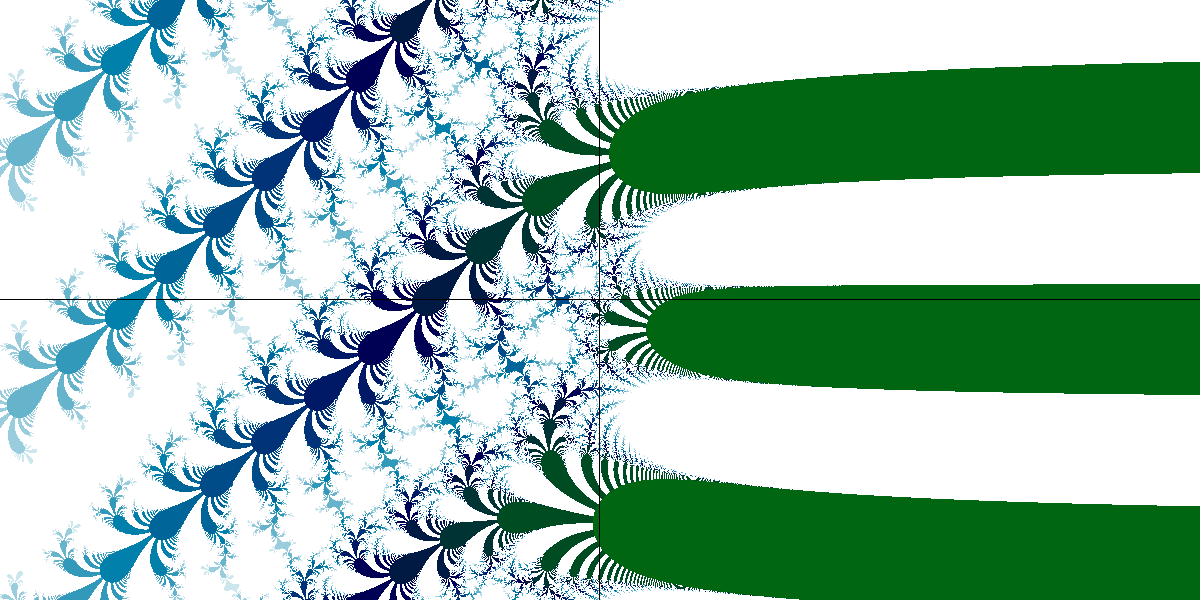

In [31]:
Gr.backend(:images)
Gr.configure(rect=(-16,16,-8,8), canvas=(1200,600), colormap=:ocean, axes=true)
drawtrappedpointsC(z -> EW(1.5+3im,z), hasescaped = z -> real(z) > 16, maxiterations = 16)

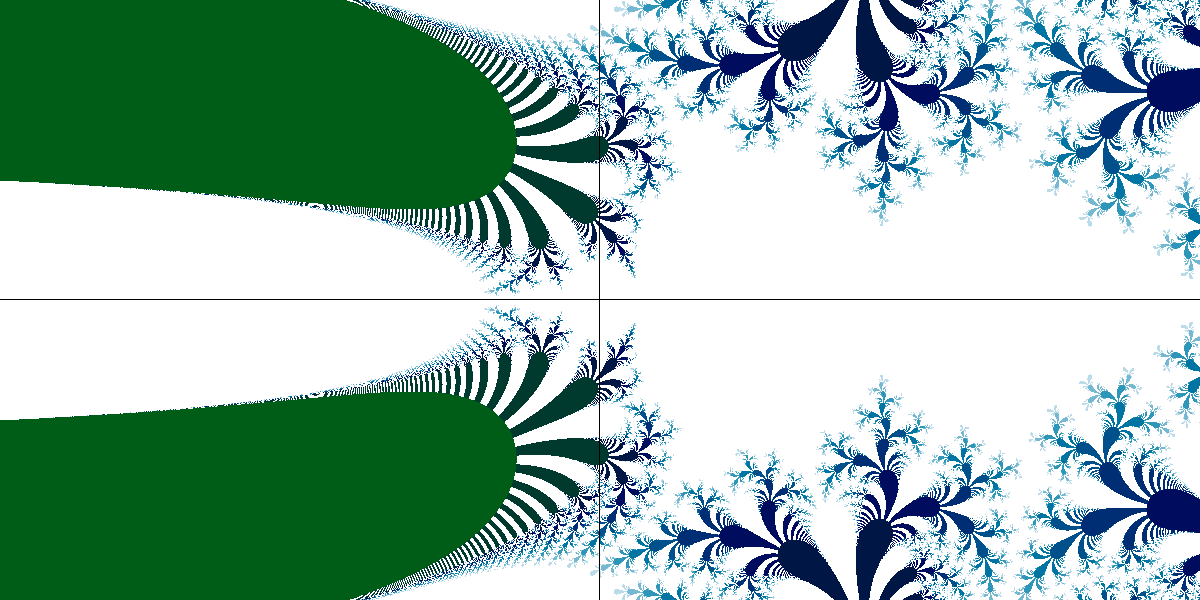

In [30]:
Gr.configure(rect=(-16,16,-8,8), canvas=(1200,600), colormap=:ocean, axes=true)
drawmandelbrotC(EW, -1, hasescaped = z -> real(z) > 16, maxiterations = 12)

In [32]:
ζ4(z::Number) = 1+1/(2^z)+1/(3^z)+1/(4^z)

ζ4 (generic function with 1 method)

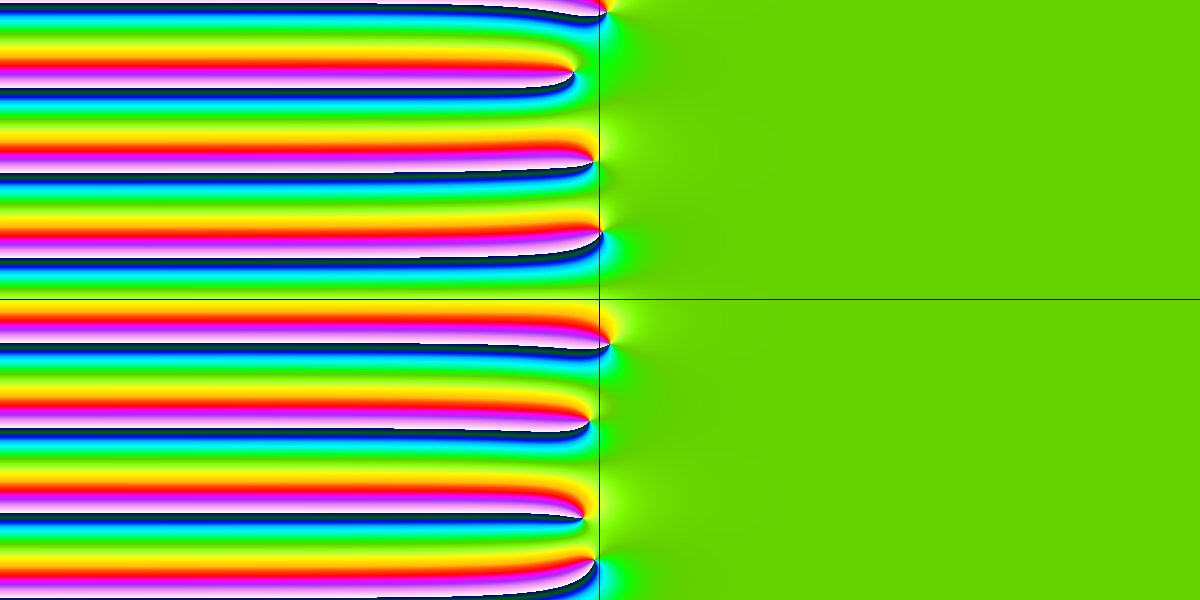

In [45]:
Gr.configure(rect=(-32,32,-16,16), colormap=:gist_ncar, cf=AngleCF(0,1))
drawpreimageC(ζ4, iterations=1)